In [1]:
import pandas as pd

In [47]:
df = pd.read_csv("test.csv")
df["Date"] = pd.to_datetime(df["Date"])
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


In [264]:
df2 = pd.read_csv("housing.csv")

In [354]:
df2["Neighborhood"].value_counts().mean()

58.4

In [356]:
import idm
import importlib
import dataframe
import summary
importlib.reload(idm)
importlib.reload(dataframe)
importlib.reload(summary)

idm.load()

Output(layout=Layout(border='solid 1px black'))

In [248]:
df[["Port Name"]].head(5)

,Port Name
0,Calexico East
1,Van Buren
2,Otay Mesa
3,Nogales
4,Trout River


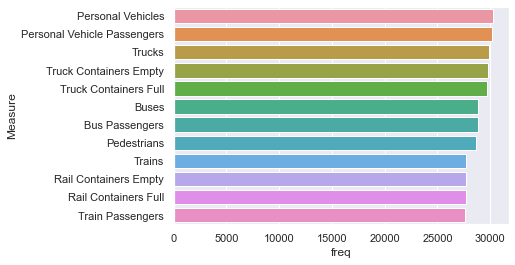

In [221]:
grouper = df.groupby('Measure').count()
col1 = grouper.columns[0]
df_ctg = grouper.sort_values(col1, ascending=False).rename(columns={col1: "freq"})[:20]
df_ctg["Measure"] = df_ctg.index.tolist()

ax = sns.barplot(x='freq', y='Measure', data=df_ctg)

plt.show()

In [212]:
sns.histplot(df["Value"])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x129700620> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='Date', ylabel='cnt'>

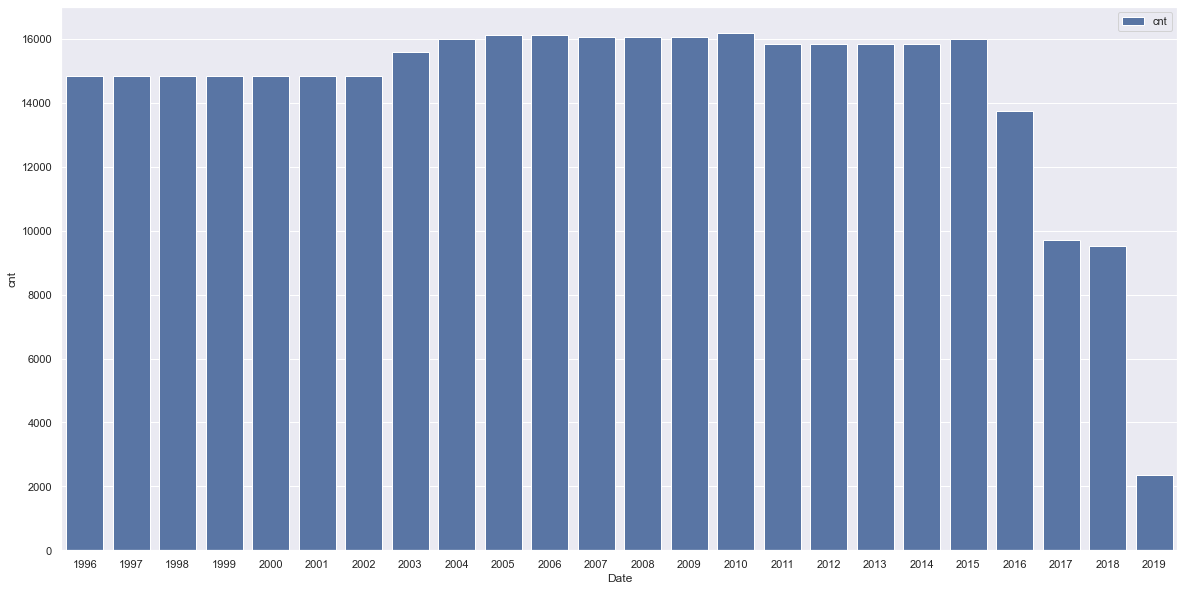

In [155]:
#df.groupby(df["Date"].dt.month).count()
import seaborn as sns
plt.figure(figsize=(20, 10))
per = df.Date.dt.to_period("M")
qq = df.groupby(df["Date"].dt.to_period("Y")).count()["Date"]
ww=pd.DataFrame(qq).rename(columns={"Date": "cnt"}).reset_index()
ww["metric"] = "cnt"
fig = sns.barplot(data=ww, x="Date", y="cnt",  hue="metric")
plt.legend()
fig
#ww.plot(kind="bar", label="count")